In [779]:
from utils import open_nea_table, download_nea_table
import pandas as pd
import numpy as np
import os
from datetime import date
import math


If needed to update the NEA table then first run  "download_nea_table"

In [780]:
nea_full_table = open_nea_table()
nea_full_table.head(3)

c:\Users\adbva\OneDrive\codes_for_presentations\exoplanet_visualization\ExoPLots\utils.py:52: DtypeWarning: Columns (65,187) have mixed types. Specify dtype option on import or set low_memory=False.
  nea_full_table = pd.read_csv(table_directory)


,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_id,default_flag,pl_refname,sy_refname,...,sy_jmagerr1,sy_jmagerr2,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_hmagstr,sy_kmag,sy_kmagerr1,sy_kmagerr2
0,OGLE-TR-10 b,b,OGLE-TR-10,NaN,NaN,TIC 130150682,Gaia DR2 4056443366649948160,1,<a refstr=TORRES_ET_AL__2008 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,NaN,NaN,13.692,13.314,0.121,-0.121,13.314&plusmn;0.121,12.856,NaN,NaN
1,BD-08 2823 c,c,BD-08 2823,NaN,HIP 49067,TIC 33355302,Gaia DR2 3770419611540574080,1,<a refstr=HEBRARD_ET_AL__2010 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.020,-0.020,7.96&plusmn;0.02,7.498,0.047,-0.047,7.498&plusmn;0.047,7.323,0.021,-0.021
2,HR 8799 c,c,HR 8799,HD 218396,HIP 114189,TIC 245368902,Gaia DR2 2832463659640297472,1,<a refstr=MAROIS_ET_AL__2008 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.027,-0.027,5.383&plusmn;0.027,5.280,0.018,-0.018,5.280&plusmn;0.018,5.240,0.018,-0.018


In [781]:
nea_full_table.columns.values

array(['pl_name', 'pl_letter', 'hostname', 'hd_name', 'hip_name',
       'tic_id', 'gaia_id', 'default_flag', 'pl_refname', 'sy_refname',
       'disc_pubdate', 'disc_year', 'discoverymethod', 'disc_locale',
       'disc_facility', 'disc_instrument', 'disc_telescope',
       'disc_refname', 'ra', 'rastr', 'dec', 'decstr', 'glon', 'glat',
       'elon', 'elat', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim', 'pl_orbperstr', 'pl_orblpererr1', 'pl_orblper',
       'pl_orblpererr2', 'pl_orblperlim', 'pl_orblperstr', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_orbsmaxstr', 'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2',
       'pl_orbincllim', 'pl_orbinclstr', 'pl_orbtper', 'pl_orbtpererr1',
       'pl_orbtpererr2', 'pl_orbtperlim', 'pl_orbtperstr', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_orbeccenstr', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'pl_eqtstr', 'pl_oc

In [782]:
relevant_columns = ['pl_name', 'pl_letter', 'hostname', 'gaia_id', 'ra', 'dec', 'disc_year', 'discoverymethod',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 
       'pl_orbsmax', 'pl_orbsmaxerr1','pl_orbsmaxerr2', 
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 
       'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 
       'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 
       'pl_bmassprov', 
       'pl_msinie', 'pl_msinieerr1', 'pl_msinieerr2',
       'st_teff', 'st_met', 'st_lum', 'st_logg', 'st_age', 'st_mass', 'st_rad', 
       'ttv_flag', 'tran_flag', 'rv_flag']

In [783]:
nea_relevant = nea_full_table[relevant_columns]
nea_relevant.to_csv('nea_relevant.csv', index = False)

In [784]:
nea_relevant.columns

Index(['pl_name', 'pl_letter', 'hostname', 'gaia_id', 'ra', 'dec', 'disc_year',
       'discoverymethod', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_masse', 'pl_masseerr1',
       'pl_masseerr2', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmassprov', 'pl_msinie', 'pl_msinieerr1', 'pl_msinieerr2',
       'st_teff', 'st_met', 'st_lum', 'st_logg', 'st_age', 'st_mass', 'st_rad',
       'ttv_flag', 'tran_flag', 'rv_flag'],
      dtype='object')

In [785]:
nea_relevant[['pl_rade', 'pl_bmasse', 'disc_year', 'discoverymethod']].head(20)

,pl_rade,pl_bmasse,disc_year,discoverymethod
0,14.011,197.046,2004,Transit
1,NaN,104.000,2009,Radial Velocity
2,13.000,3000.000,2008,Imaging
3,NaN,3524.590,2009,Radial Velocity
4,NaN,451.000,2009,Radial Velocity
5,NaN,184.330,2010,Radial Velocity
6,NaN,473.547,2011,Radial Velocity
7,2.800,508.500,2011,Transit
8,NaN,3994.486,2006,Imaging
9,NaN,572.070,2010,Radial Velocity


# Mass discovery year plot

In [786]:
# select planets with
nea_mass_year_sample =  nea_relevant[nea_relevant.pl_bmasse > 0].reset_index()
nea_mass_year_sample = nea_mass_year_sample[['pl_bmasse', 'disc_year', 'discoverymethod']]
nea_mass_year_sample

,pl_bmasse,disc_year,discoverymethod
0,197.04600,2004,Transit
1,104.00000,2009,Radial Velocity
2,3000.00000,2008,Imaging
3,3524.59000,2009,Radial Velocity
4,451.00000,2009,Radial Velocity
...,...,...,...
2425,664.26137,2021,Microlensing
2426,959.84179,2021,Microlensing
2427,1976.89269,2021,Microlensing
2428,310.83618,2021,Transit


# Separating different discovery methods

In [787]:
set(nea_mass_year_sample.discoverymethod)

{'Astrometry',
 'Disk Kinematics',
 'Eclipse Timing Variations',
 'Imaging',
 'Microlensing',
 'Orbital Brightness Modulation',
 'Pulsar Timing',
 'Pulsation Timing Variations',
 'Radial Velocity',
 'Transit',
 'Transit Timing Variations'}

In [788]:
#Planets discovered by Transit method or TTV are considered as Transiting planets
nea_mass_year_Transit = nea_mass_year_sample[(nea_mass_year_sample.discoverymethod == 'Transit') | (nea_mass_year_sample.discoverymethod == 'Transit Timing Variations')]
nea_mass_year_RV = nea_mass_year_sample[nea_mass_year_sample.discoverymethod == 'Radial Velocity']
nea_mass_year_Imaging = nea_mass_year_sample[nea_mass_year_sample.discoverymethod == 'Imaging']
nea_mass_year_Microlensing = nea_mass_year_sample[nea_mass_year_sample.discoverymethod == 'Microlensing']


# Selecting planets detected by "Other" methods
rv_trainsiting_imaging_microlensing = pd.concat([nea_mass_year_RV, nea_mass_year_Transit, nea_mass_year_Imaging, nea_mass_year_Microlensing])
nea_mass_year_Other = nea_mass_year_sample.drop(rv_trainsiting_imaging_microlensing.index)


print (f' Transiting/TTV planets: {len(nea_mass_year_Transit)}\n RV planets: {len(nea_mass_year_RV)}\n Imaging planets: {len(nea_mass_year_Imaging)}\n Microlensing planets: {len(nea_mass_year_Microlensing)} \n Other planets: {len(nea_mass_year_Other)}')

 Transiting/TTV planets: 1088
 RV planets: 1043
 Imaging planets: 64
 Microlensing planets: 200 
 Other planets: 35


In [789]:
import matplotlib.pyplot as plt
import seaborn as sns

In [790]:
from PIL import Image

def change_resolution(input_path, output_path, scale):
    # Open the image
    image = Image.open(input_path)

    width, height = image.size
    print (width, height)

    new_width, new_height = int(width*scale), int(height*scale)

    # Resize the image
    resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)

    # Save the resized image
    resized_image.save(output_path)

# Example usage
#change_resolution('./ss_planet_images/pngaaa.com-267808.png', 'nobel.png', 0.11)
#change_resolution('./ss_planet_images/pngaaa.com-107985.png', './ss_planet_images/earth.png', 0.1)
#change_resolution('./ss_planet_images/pngaaa.com-107985.png', './ss_planet_images/earth.png', 0.1)
#change_resolution('./ss_planet_images/pngaaa.com-107985.png', './ss_planet_images/earth.png', 0.1)


In [791]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    return artists

The images are taken (and then resized) from pngaa.com under License of "Non-comercial Use"

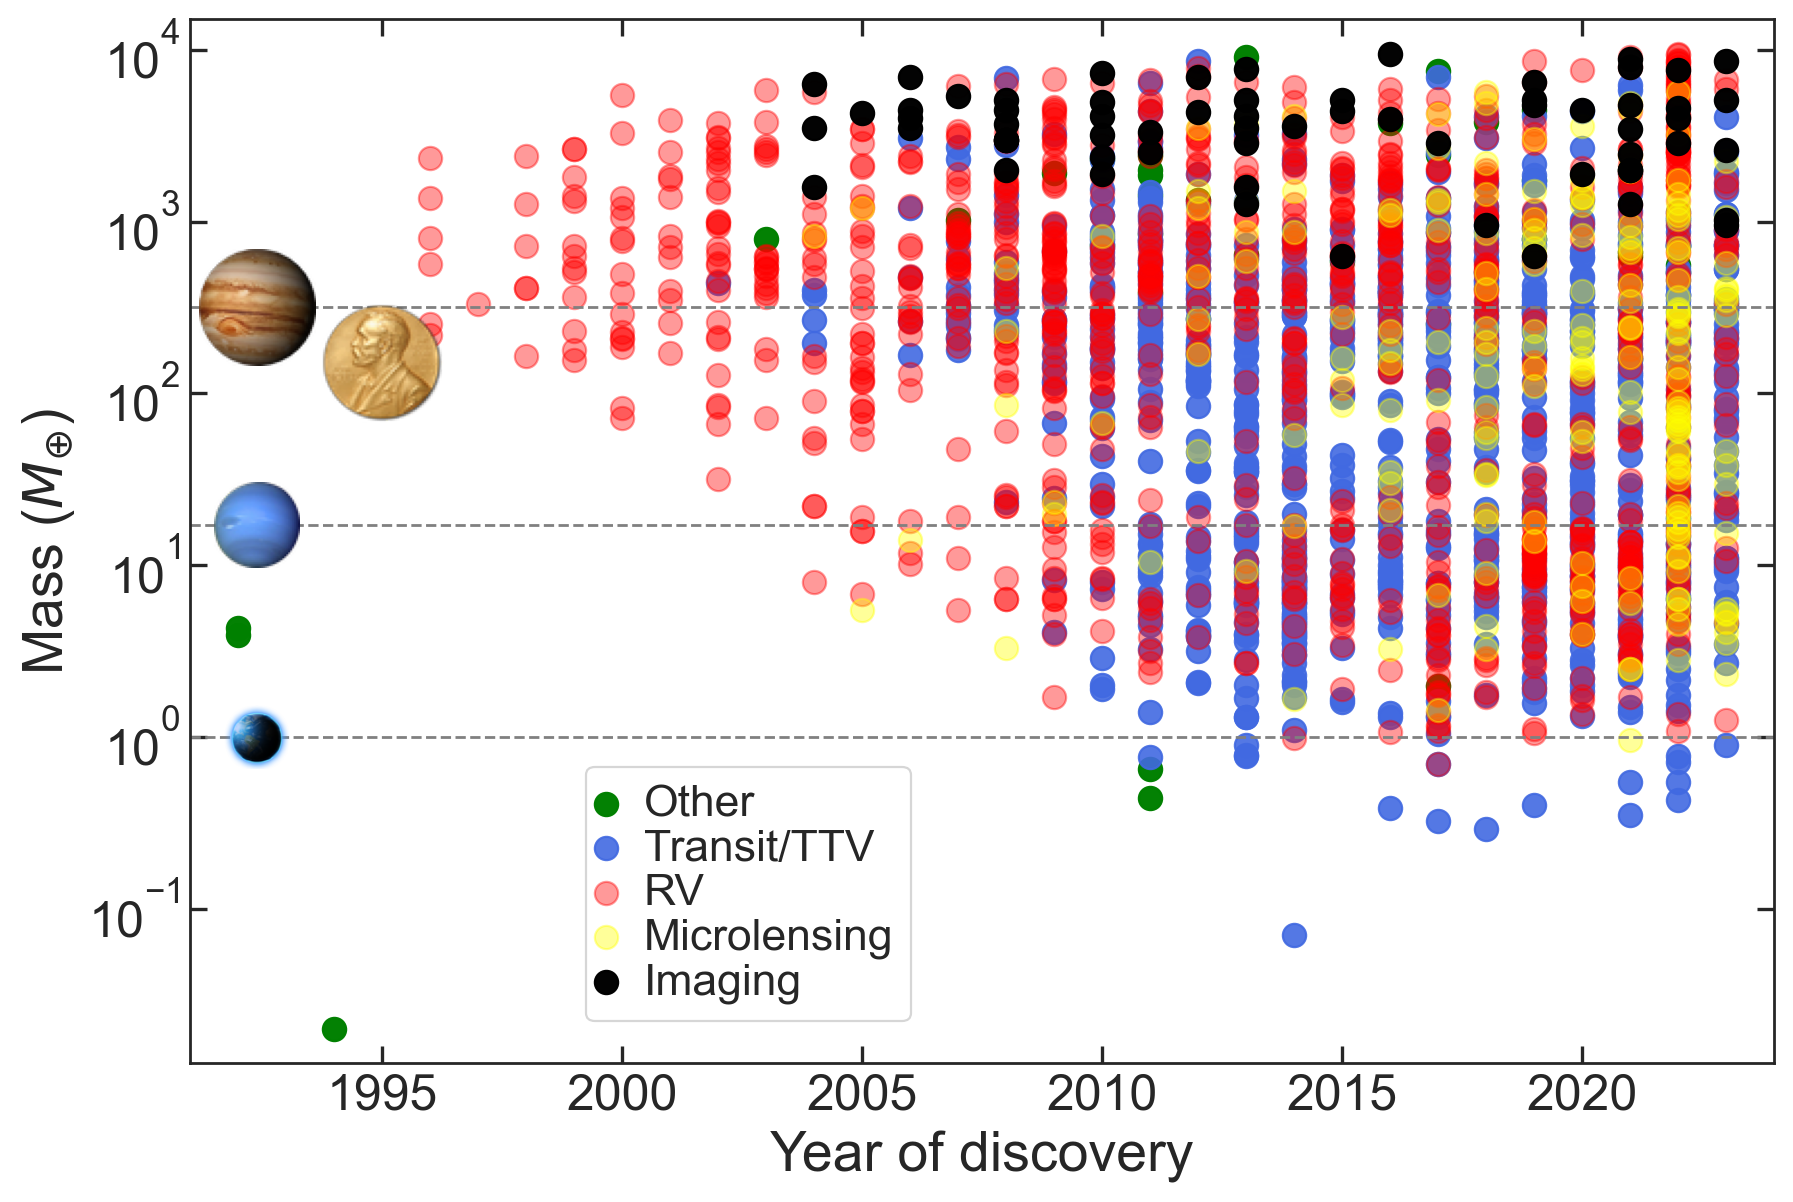

In [798]:
def mass_vs_year_plot():
    sns.set_style('ticks')
    sns.set_style("white")
    plt.rcParams['legend.handlelength'] = 0.1


    # The lower limit of x is fixed to 1988
    # the upper limit will be set one year after the current date
    today = date.today()
    current_year = today.year


    fig = plt.figure(1, figsize = (9,6), dpi = 200)
    ax = plt.gca()
    fig.subplots_adjust(left=0.1, right=0.98, bottom = 0.12, top = 0.99)

    ax = plt.subplot(1, 1, 1)

    ax.scatter(nea_mass_year_Other.disc_year, nea_mass_year_Other.pl_bmasse,  color = 'green', s=70, alpha = 0.99, label='Other')
    ax.scatter(nea_mass_year_Transit.disc_year, nea_mass_year_Transit.pl_bmasse,  color = 'royalblue', s=70, alpha = 0.9, label='Transit/TTV')
    ax.scatter(nea_mass_year_RV.disc_year, nea_mass_year_RV.pl_bmasse,  color = 'red', s=70, alpha = 0.4, label='RV')
    ax.scatter(nea_mass_year_Microlensing.disc_year, nea_mass_year_Microlensing.pl_bmasse,  color = 'yellow', s=70, alpha = 0.4, label='Microlensing')
    ax.scatter(nea_mass_year_Imaging.disc_year, nea_mass_year_Imaging.pl_bmasse,  color = 'black', s=70, alpha = 0.99, label='Imaging')

    plt.hlines(y=1, xmin=1991, xmax=current_year+1, linewidth=1, color = 'grey', linestyle='--')
    plt.hlines(y=17.15, xmin=1991, xmax=current_year+1, linewidth=1, color = 'grey', linestyle='--')
    plt.hlines(y=317, xmin=1991, xmax=current_year+1, linewidth=1, color = 'grey', linestyle='--')
    ax.tick_params(axis='both', which='major', direction='in', length=6, width=1.2)


    current_dir = os.getcwd()
    images_directory = os.path.join(current_dir, 'ss_planet_images')

    x = 1992.4
    y = 1.0
    image_path = os.path.join(current_dir, 'ss_planet_images', 'earth.png')
    imscatter(x, y, image_path, zoom=0.4, ax=ax)

    x = 1992.4
    y = 317
    image_path = os.path.join(current_dir, 'ss_planet_images', 'jupiter.png')
    imscatter(x, y, image_path, zoom=0.7, ax=ax)

    x = 1992.4
    y = 17.15
    image_path = os.path.join(current_dir, 'ss_planet_images', 'neptune.png')
    imscatter(x, y, image_path, zoom=0.7, ax=ax)

    x = 1995
    y = 150
    image_path = os.path.join(current_dir, 'ss_planet_images', 'nobel.png')
    imscatter(x, y, image_path, zoom = 0.8, ax=ax)

    ax.set_yscale('log')
    ymin = np.min(np.log10(nea_mass_year_sample.pl_bmasse)) - 0.2
    ymax = np.max(np.log10(nea_mass_year_sample.pl_bmasse)) + 0.2

    plt.ylim(10**ymin,10**ymax)
    plt.xlim(1991,current_year+1)


    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.legend(loc=(0.25, 0.04), fontsize = 16, labelspacing=0.1)

    plt.tick_params(axis='both', 
    top='on', bottom = 'on', right = 'on', left = 'on')

    plt.ylabel('Mass ($M_{\mathrm{\oplus}}$)', fontsize = 20)
    plt.xlabel('Year of discovery', fontsize = 20)

    plt.savefig('mass_vs_year.png', facecolor = 'White')

mass_vs_year_plot()